# **SPE COLOMBIA - HACKATON 2020**

## **Introduction**
Welcome to the EDA of SPE Colombia Section's 2020 Hackaton. <br>

In here you'll find all questions from the scope of work, answered by generic functions whose functioning is thoroughly explained. <br>

The goal of this competition is to provide insights regarding the production data from ANH, the Colombian National Petroleum Agency. <br>

The code below was programmed by Higor Esmeraldo and Marco Gemaque and is free for use.

Mount Google Drive

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [7]:
df_real = pd.read_excel('/content/drive/My Drive/Python Notebook/colombia_consolidado.xlsx')
df_real_blind = pd.read_excel('/content/drive/My Drive/Python Notebook/colombia_blind.xlsx')

x = input("Which database do you want? BLIND or REAL?")
if x == 'BLIND':
    df = df_real_blind.copy()
elif x == "REAL":
    df = df_real.copy()
else:
    print('Wrong input.')

month_cols = ['Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio','Agosto','Septiembre',
                  'Octubre','Noviembre','Diciembre'] #We create a list contianing all months

params = {"Enero":31,"Febrero":28,"Marzo":31,"Abril":30,"Mayo":31,"Junio":30,"Julio":31,
          "Agosto":31,"Septiembre":30,"Octubre":31,"Noviembre":30,"Diciembre":31} #days in year of non-leap year

df[month_cols] = df[month_cols].assign(**params).mul(df[month_cols]) #Correct from barrels per day to total barrels per month. No leap-year.

Which database do you want? BLIND or REAL?REAL


## **Solución de Filtro Sencillo**
Retorna la soma total de la producción de cualquier período. <br>



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


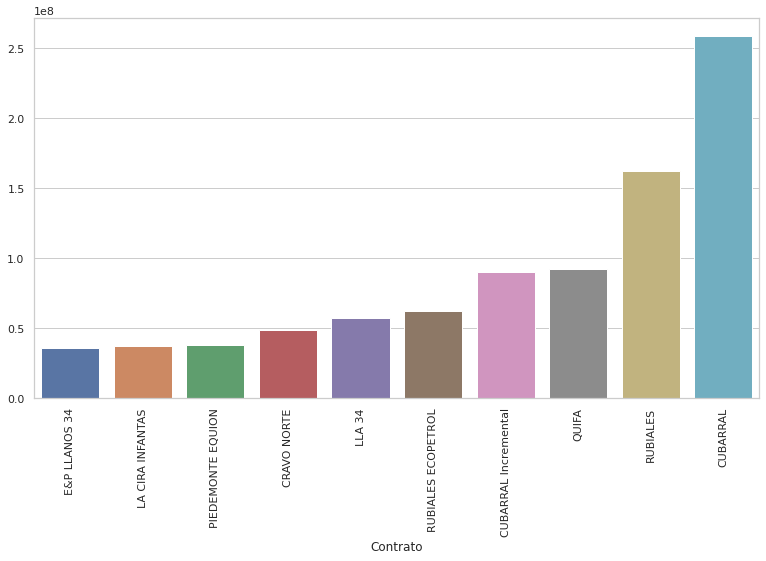

In [8]:
#@title Ranking to find production by year *(double click to show code)* <br> Answer to Questions: 1, 3, 4, 8. { display-mode: "form" }

Year = 2018 #@param
Month = "" #@param
Filter = 'Contrato' #@param
Order = True #@param
Rows =  10#@param

def rank_production(df_in, year=2020, months="", filter='Operadora', order=True, rows=10):
    #Function created to return a ranked table for the given parameters
    month_cols = ['Enero','Febrero','Marzo','Mayo','Junio','Julio','Agosto','Septiembre',
                  'Octubre','Noviembre','Diciembre']
    if months == "":
        values = month_cols
    else:
        values = months.split(",") #Create list of months
    df_entry = df_in.copy()
    df_int = pd.DataFrame(columns=[df_entry.columns]) #Get columns to our new df
    categories = [year, filter] #All the category dataframes we have
    list_full = [] #empty list to fill with filters
    for cat in categories: #Loop through filters we have
        list_param = str(cat).split(",") #Separate our strings by ','
        list_full.append(list_param) #append to the big list
        df_int = df_entry[df_entry.columns & list_param] #Create a dataframe based on that list of parameters
    
    for value in values: #Create a column for each month selected
        df_int[value] = df_entry[value]
    df_int['Total'] = df_entry[values].sum(axis=1) #Sum the selection
    df_int = df_int.groupby([filter])['Total'].sum()
    df_int = df_int.sort_values(ascending=False)
    df_int = df_int.iloc[:rows]
    df_int = df_int.sort_values(ascending=order)
    sns.set(style="whitegrid")
    plt.figure(figsize=(13,7))
    ax = sns.barplot(x=df_int.index, y=df_int.values)
    plt.xticks(rotation=90)
    return df_int

solution = rank_production(df,Year,Month,Filter,Order,Rows)

## **Composición de Producción por Departamento o Contracto**
Retorna la cantidade de produtores en cada departamento o contrato. Es possible limitar por una cantidade mínima (*thresold*)

In [9]:
#@title Returns composition of production by filter *(double click to show code)* <br> Answer to Question: 2. <br> *If months = "", selects all months.* { display-mode: "form" }

Year = 2020 #@param
Macro_Filter = 'Departamento' #@param
Specific = 'Casanare' #@param
Limite =  'Campo' #@param
Threshold = 5 #@param

def composition(df_in, year=2020, macros="Departamento", micros="CASANARE", limite="Campo", thresh=5):
    #Function created to return the composition of department or contract in terms of production.
    micros = micros.upper()
    filters = [year,macros] #We separate key columns for us
    month_cols = ['Enero','Febrero','Marzo','Mayo','Junio','Julio','Agosto','Septiembre',
                  'Octubre','Noviembre','Diciembre']
    df_entry = df_in.copy() #So we don't get caveat error
    df_entry = df_entry.loc[df_entry['Year'] == year]
    df_entry['Total'] = df_entry[month_cols].sum(axis=1) #Create total production column
    df_entry = df_entry.loc[df_entry[macros] == micros] #Get the filtered value = CASANARE
    #df_group = df_entry.groupby(by=['Operadora','Campo'])['Total'].sum()
    res = df_entry.reset_index().groupby(['Operadora'])['Total'].nunique()
    res = res.sort_values(ascending=False)
    res = res[res > thresh]
    return res

solution = composition(df)

In [10]:
solution

Operadora
PERENCO COLOMBIA LIMITED                            35
Frontera Energy Colombia Corp Sucursal Colombia     32
ECOPETROL S.A.                                      12
GEOPARK COLOMBIA S.A.S.                             11
PAREX RESOURCES COLOMBIA LTD. SUCURSAL               8
CEPSA COLOMBIA S.A.                                  7
COLOMBIA ENERGY DEVELOPMENT CO                       6
PERENCO OIL AND GAS COLOMBIA LIMITED.                6
NEW GRANADA ENERGY CORPORATION SUCURSAL COLOMBIA     6
Name: Total, dtype: int64

## **Análisis Comparativos de Periodos**
El usuario proporciona dos años e una série de meses y recibe un gráfico con ambos. Es posible también separar por algun otro filtro como operadora o contracto. <br>

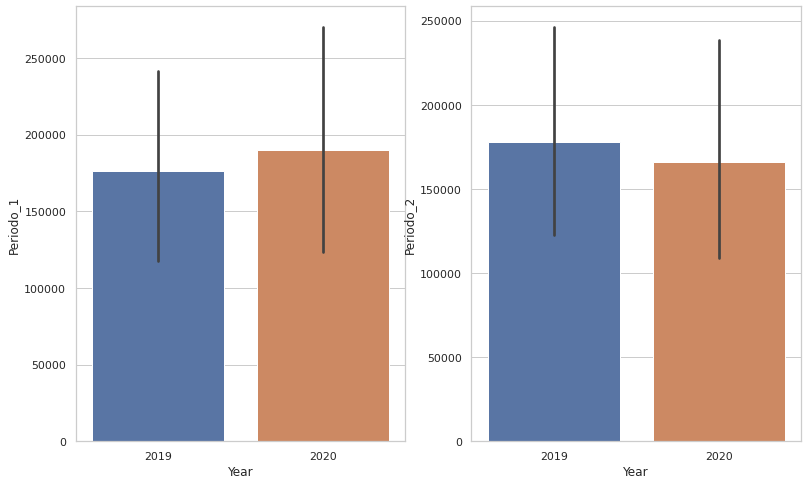

In [11]:
#@title Returns comparison between two periods of time. Answer to Questions: 5  { display-mode: "form" }

Year = '2020,2019' #@param
Period1 = 'Enero,Febrero,Marzo' #@param
Period2 = 'Abril,Mayo,Junio' #@param

def period_comparison(df_in, years='2020,2019', period1="", period2=""):
    #Function created to compare 2 date-periods and return production.
    df_entry = df_in.copy()
    years = years.split(',') #Separate into lists
    period1 = period1.split(',') #Separate into lists
    period2 = period2.split(',') #Separate into lists
    list_filters = [years,period1,period2] #Select the columns we want
    df_entry = df_entry.loc[df_entry['Year'].isin(years)]
    df_entry['Periodo_1'] = df_entry[period1].sum(axis=1)
    df_entry['Periodo_2'] = df_entry[period2].sum(axis=1)
    f, axes = plt.subplots(1,2, figsize=(13,8))
    sns.barplot(x=df_entry['Year'], y=df_entry['Periodo_1'], ax=axes[0])
    sns.barplot(x=df_entry['Year'], y=df_entry['Periodo_2'], ax=axes[1])

solution = period_comparison(df, period1=Period1, period2=Period2)

## **Filtro Específico por Categoria**
Esta función retorna la producción de un determinado período para una classificación específica y su valor llave.

In [12]:
#@title Returns specific production by period, filter and value. Answer to Questions: 7 { display-mode: "form" }

Year = '2020' #@param
Months = "" #@param #if "" selected picks all months
Filter = "" #@param

def specific_production(df_in, year="2020", months="", macro='ECOPETROL S.A.'):
    #Function created to return production for specific filter and its value
    df_entry = df_in.copy()
    month_cols = ['Enero','Febrero','Marzo','Mayo','Junio','Julio','Agosto','Septiembre',
                  'Octubre','Noviembre','Diciembre']
    if months == "":
        months = month_cols
    else:
        months = months.split(',')
    df_entry['Total'] = df_entry[months].sum(axis=1)
    df_entry = df_entry.loc[df_entry['Operadora'] == macro]
    total = df_entry['Total'].sum()
    print("The total production for {} in the period was of {} barrels per day".format(macro,round(total)))

solution = specific_production(df)

The total production for ECOPETROL S.A. in the period was of 574382744.0 barrels per day


## **Declínio de Arps Hiperbólico**
Devuelve la tasa de declínio de la teoria de Arps para el caso hiperbólico.

In [14]:
#@title Returns specific production by period, filter and value. Answer to Questions: 10 { display-mode: "form" }

Campo = "UNDERRIVER" #@param

def decline_curve(df_in, campo=Campo, b=0.5):
    #Function created to return the DCA of a specified field
    df_entry = df_in.copy()
    df_entry = df_entry.loc[df_entry['Campo'] == campo]
    df_entry = df_entry.melt(id_vars=["Departamento","Municipio","Operadora","Contrato","Campo","Year","Fluido"], 
                   var_name="Date", 
                   value_name="Production")
    max_row = df_entry['Production'].idxmax(axis=1)
    """
    Remembering that the formula is 
    qt = qi / (1+bDit)^(1/b)
    Relevant link: https://petrowiki.org/Production_forecasting_decline_curve_analysis#:~:text=Decline%20curve%20analysis%20(DCA)%20is,fluids%2C%20are%20usually%20the%20cause.
    """
    qi = df_entry.iloc[max_row]['Production'] #our max rate
    x = df_entry.iloc[max_row:]['Production'].to_list() #Get all our production starting from the max value
    x = [(qi/y)**b if y > 0 else 1 for y in x]
    y = [x for x in range(len(x))]
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    ai = slope * 1/b #decline rate per month
    print("La tasa promedio de declínio es de {} barriles por mes".format(round(ai,2)))

solution = decline_curve(df, campo='UNDERRIVER')

La tasa promedio de declínio es de 2.37 barriles por mes


## **Producción más variable**
Retorna al usuário para un determinado año la producción más variable.

In [24]:
#@title Returns specific production by period, filter and value. Answer to Questions: 10 { display-mode: "form" }

Year= 2020 #@param

def variance_prod(df_in, year=2020):
    #Function created to return the DCA of a specified field
    df_entry = df_in.copy()
    df_entry = df_entry.loc[df_entry['Year'] == year]
    month_cols = ['Enero','Febrero','Marzo','Mayo','Junio','Julio','Agosto','Septiembre',
                  'Octubre','Noviembre','Diciembre']
    df_entry['var'] = df_entry[month_cols].var(axis=1)
    df_entry = df_entry.sort_values(by=['var'], ascending=False)
    return df_entry

solution = variance_prod(df)

In [25]:
solution

,Departamento,Municipio,Operadora,Contrato,Campo,Enero,Febrero,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre,Year,Fluido,var
1247,META,PUERTO GAITAN,ECOPETROL S.A.,RUBIALES,RUBIALES,3618445.24,3245604.32,3271716.75,2998263.3,3153830.88,3044613.3,3317506.23,3367880.61,0.0,0.0,0.0,0.0,2020,Petroleo,2.772311e+12
1207,META,CASTILLA NUEVA,ECOPETROL S.A.,CUBARRAL,CASTILLA,2144794.83,1900375.12,2085952.80,1997256.6,2046553.97,2005997.1,2063159.74,2029569.69,0.0,0.0,0.0,0.0,2020,Petroleo,1.062226e+12
1212,META,ACACIAS,ECOPETROL S.A.,CUBARRAL,CHICHIMENE,1563426.41,1353251.48,1575796.96,1299627.6,1320379.59,1380138.9,1557662.58,1536166.87,0.0,0.0,0.0,0.0,2020,Petroleo,5.573151e+11
1209,META,ACACIAS,ECOPETROL S.A.,CUBARRAL,CASTILLA NORTE,1390583.74,1267559.44,1444482.82,1382730.6,1366960.50,1305036.3,1323409.53,1299982.52,0.0,0.0,0.0,0.0,2020,Petroleo,4.610694e+11
1245,META,PUERTO GAITAN,Frontera Energy Colombia Corp Sucursal Colombia,QUIFA,QUIFA,1390837.32,1235616.20,1320799.33,1182580.2,1050215.83,1019016.3,1042869.45,1000585.14,0.0,0.0,0.0,0.0,2020,Petroleo,3.530088e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1084,CASANARE,YOPAL,COLOMBIA ENERGY DEVELOPMENT CO,RIO VERDE,MARSUPIAL,9.92,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,2020,Petroleo,8.946036e+00
956,ATLANTICO,PONEDERA,LEWIS ENERGY COLOMBIA INC,SSJN-1,MERECUMBE,0.00,0.00,8.06,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,2020,Petroleo,5.905782e+00
1306,SANTANDER,CIMITARRA,COMPAÑIA OPERADORA PETROCOLOMBIA S.A.S - COPP,OPÓN,LILIA,0.00,0.00,7.44,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,2020,Petroleo,5.032145e+00
1323,TOLIMA,GUAMO,LAS QUINCHAS RESOURCE CORP SURCURSAL COLOMBIA,GUASIMO,LISA,0.93,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,2020,Petroleo,7.862727e-02
